# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_s(t,u) = x(t,u)C(t,u)\quad \text{with}\quad C(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_s,u - lT_s)
$$ $C$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_s$ writes:
$$
X_s(f,g) = \frac1{T_s^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_s,g-lf_s)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_s(kT_s,lT_s) \operatorname{sinc}(\pi f_s (t-kT_s)) \operatorname{sinc}(\pi f_s(u - lT_s))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>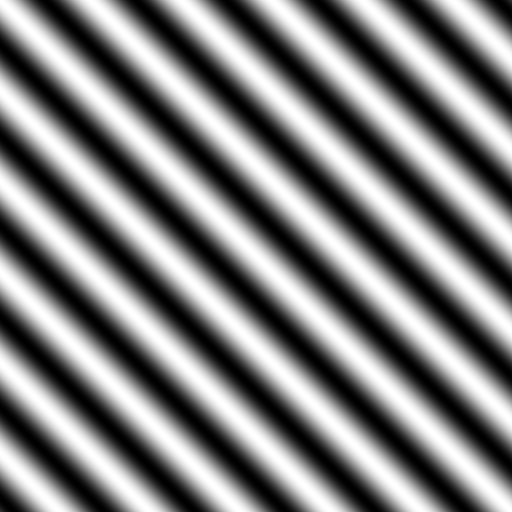</div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.

In [1]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
%matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D
import scipy

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Ts, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Ts-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Ts-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    

    

1. We provide the function `sinusoid2d(A, theta, L, T0, Ts)` that allows to sample signal $s_\theta$ with a sampling period of `Ts` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Ts=1`.


[[ 1.          0.9975914   0.99037719 ... -0.7128209  -0.66245561
  -0.60889914]
 [ 0.9975914   1.          0.9975914  ... -0.75975238 -0.7128209
  -0.66245561]
 [ 0.99037719  0.9975914   1.         ... -0.80302397 -0.75975238
  -0.7128209 ]
 ...
 [-0.7128209  -0.75975238 -0.80302397 ...  1.          0.9975914
   0.99037719]
 [-0.66245561 -0.7128209  -0.75975238 ...  0.9975914   1.
   0.9975914 ]
 [-0.60889914 -0.66245561 -0.7128209  ...  0.99037719  0.9975914
   1.        ]]


<IPython.core.display.Javascript object>


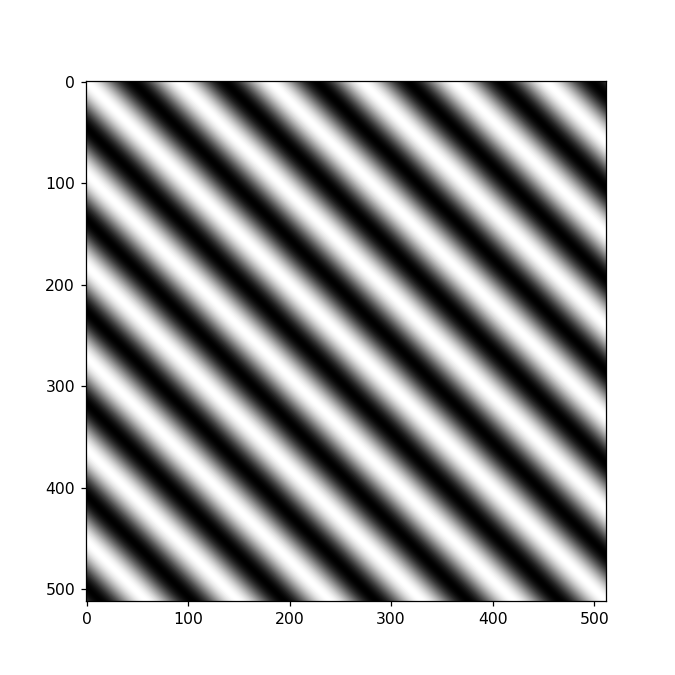

In [2]:
sig = sinusoid2d(1, 45, 512, 64, 1)
print(sig)
imshow(sig)

2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

Maximal frequency is $\frac{\square{2}}{2}
The sampling rate limit must be equal to or greater than twice the highest frequency that we care about in the signal. Otherwise we could miss information and face a phenomenon called aliasing.

\begin{equation*}
\frac{1}{\Bigl(\sqrt{\phi \sqrt{5}}-\phi\Bigr) e^{\frac25 \pi}} =
1+\frac{e^{-2\pi}} {1+\frac{e^{-4\pi}} {1+\frac{e^{-6\pi}}
{1+\frac{e^{-8\pi}} {1+\ldots} } } }
\end{equation*}

2. (b)  Sample $s_{45}$ with $f_s = 16 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


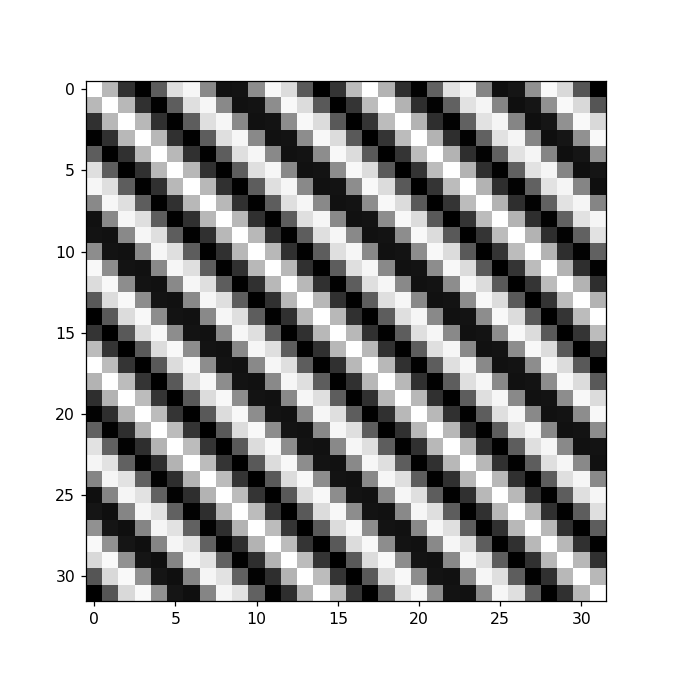

In [3]:
sig16 = sinusoid2d(1, 45, 512, 64, 16)
imshow(sig16)

2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

<IPython.core.display.Javascript object>


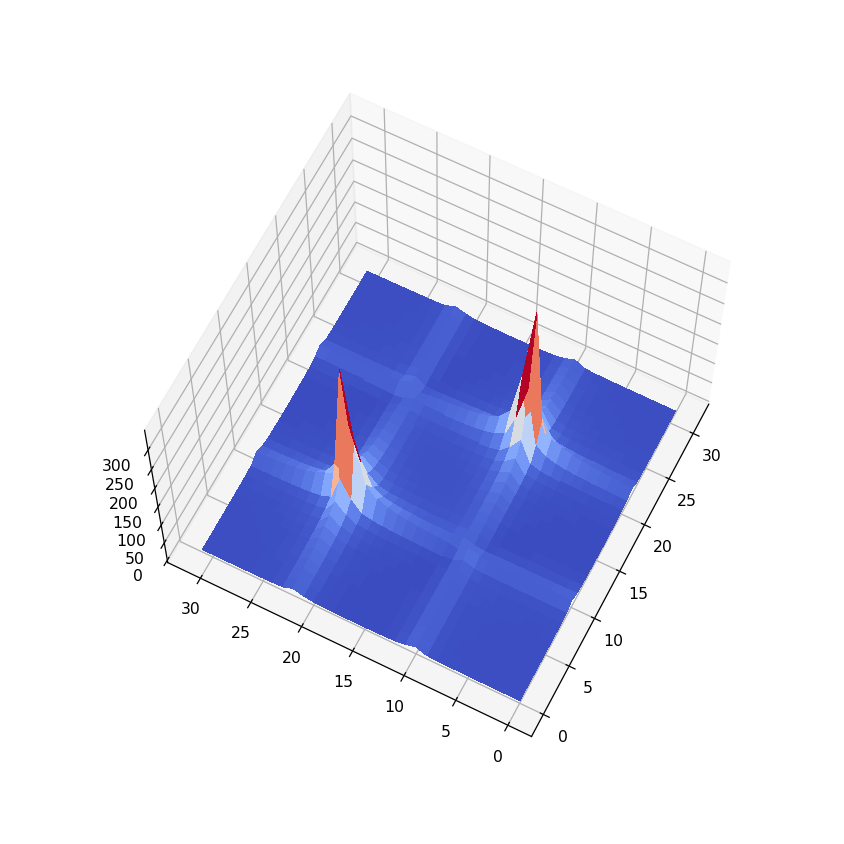

C:\Users\mojan\AppData\Local\Temp\ipykernel_12484\3906201160.py:40: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [4]:
fourier_16 = np.abs(fft2(sig16))
surf(fftshift(fourier_16))


2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_s$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

in the interactive plot we can observe that there are two dirac peaks.
For the smaller values of Te the peaks are all close together and not very high.( The color of the pixels changed quite frequently)
As we increase the value of Te the two peaks move further away from eachother but become more dense, meaning that for larger values the color of the pixels doesnt change frequently and the spectrum is smaller, in contrast with larger values.

The limit is about 650. As we increase T0, the period gets smaller 

3. (a) Sample $s_{45}$ with $f_s=4 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


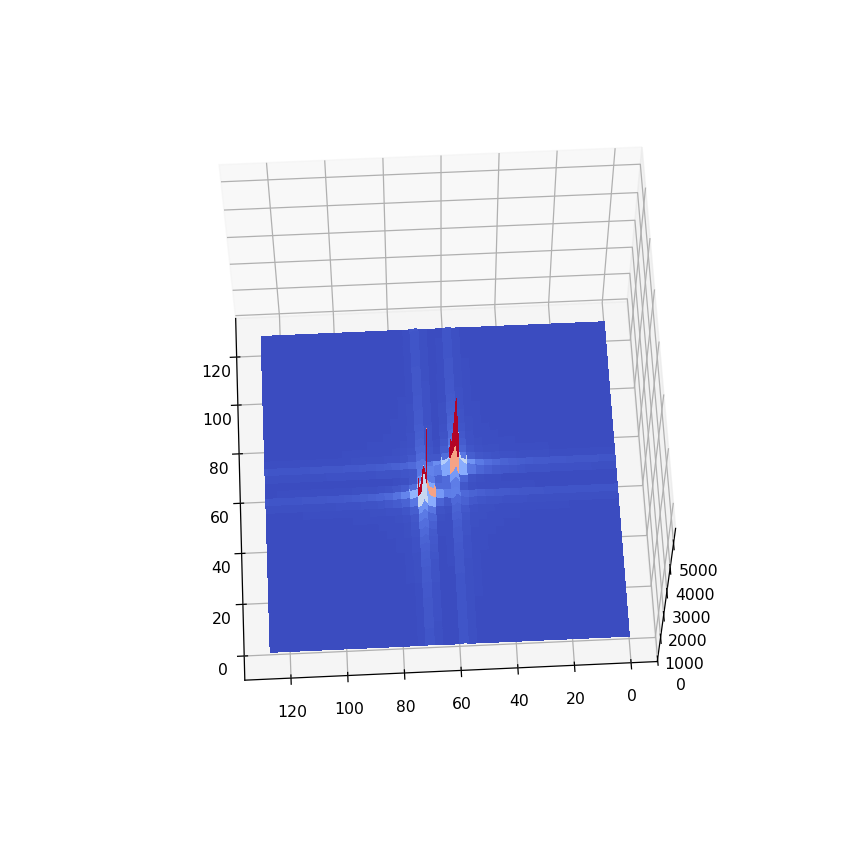

C:\Users\mojan\AppData\Local\Temp\ipykernel_12484\3906201160.py:40: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [5]:
sig4 = sinusoid2d(1, 45, 512, 64, 4)
fourier_4 = np.abs(fft2(sig4))
surf(fftshift(fourier_4))


3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [6]:
def error(A, L, original, reconstructed):
    temp = 0
    h, w = original.shape
    for i in range(h):
        for j in range(w):
            err = np.abs(original[i,j] - reconstructed[i,j])
            temp += err
    return temp/(2*A*L*L)
    

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

<IPython.core.display.Javascript object>


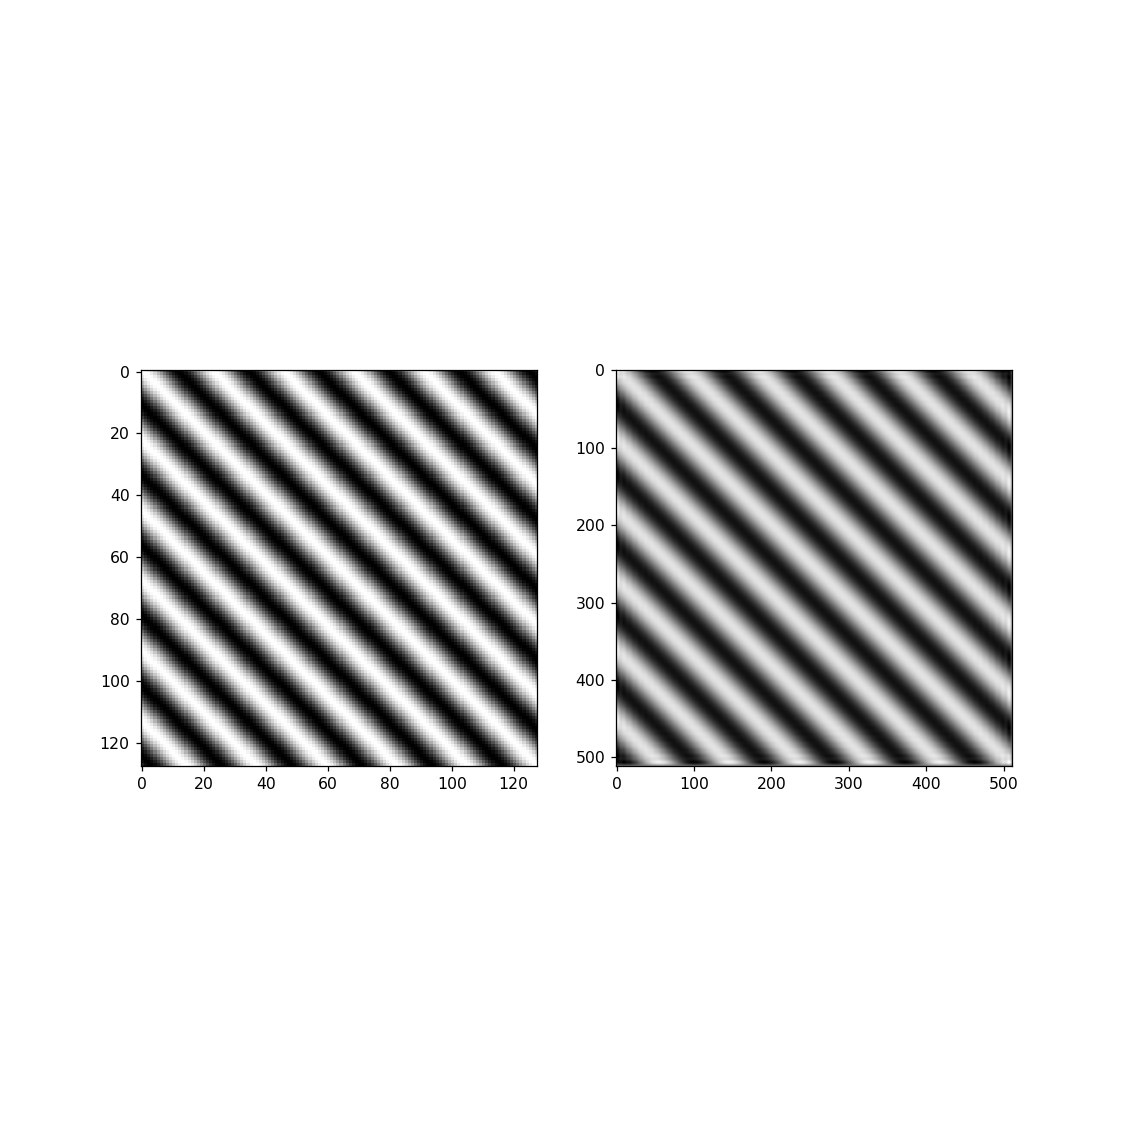

0.025428736596402022


In [7]:
reconstructed_img = shannonInterpolation(sig4, 4, 512)
f = plt.figure(figsize=(10, 10))
f.add_subplot(1,2, 1)
plt.imshow(sig4, cmap="gray")
f.add_subplot(1,2, 2)
plt.imshow(reconstructed_img, cmap="gray")

print(error(1, 512, sig4, reconstructed_img))

##The reason for this error is that the sampling rate is above the Nyquist rate( 2 x maximal frequency. )
#Further increases in the sampling frequency do not improve the quality of the reconstructed signal.



4. Same question than 3. with $f_s = \frac32f_m$. Comment the effects of aliasing.

<IPython.core.display.Javascript object>


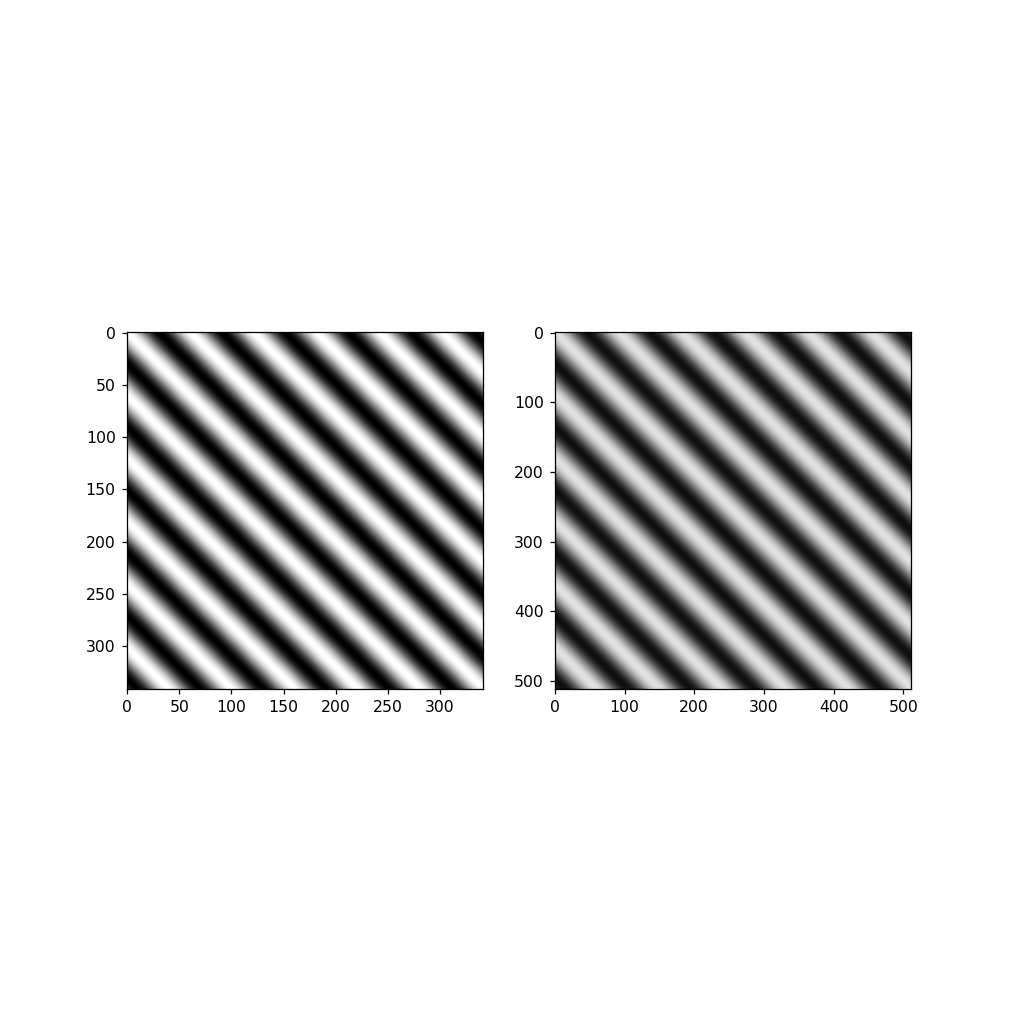

0.025389558661960063


In [9]:
sig_test = sinusoid2d(1, 45, 512, 64, 3/2)
f = plt.figure(figsize=(9, 9))
f.add_subplot(1,2, 1)
plt.imshow(sig_test, cmap="gray")
f.add_subplot(1,2, 2)
plt.imshow(shannonInterpolation(sig_test, 3/2, 512), cmap="gray")

print(error(1, 512, sig4, shannonInterpolation(sig_test, 3/2, 512)))

#the sampling rate is 3/2 x max frequency( less than the Nyquist limit)
#The white areas now are gray. Meaning the the image coudlnt be perfectly reconstructed

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_s$ what is the additional drawback appearing after the reconstruction? Explain.

<IPython.core.display.Javascript object>


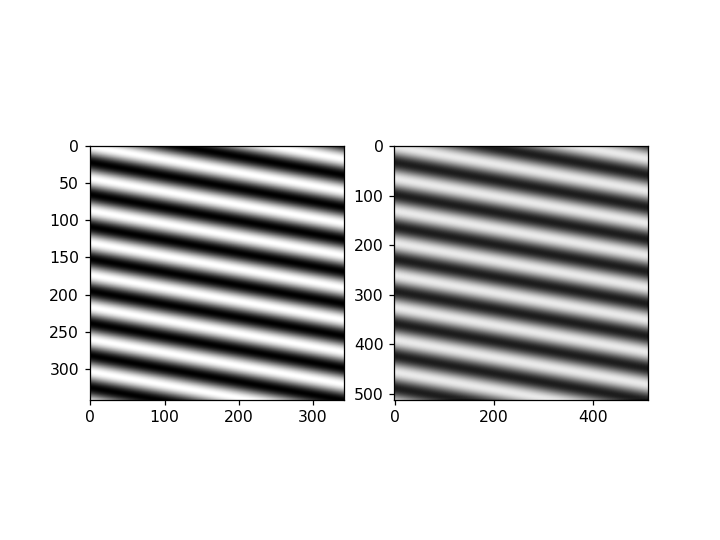

<IPython.core.display.Javascript object>


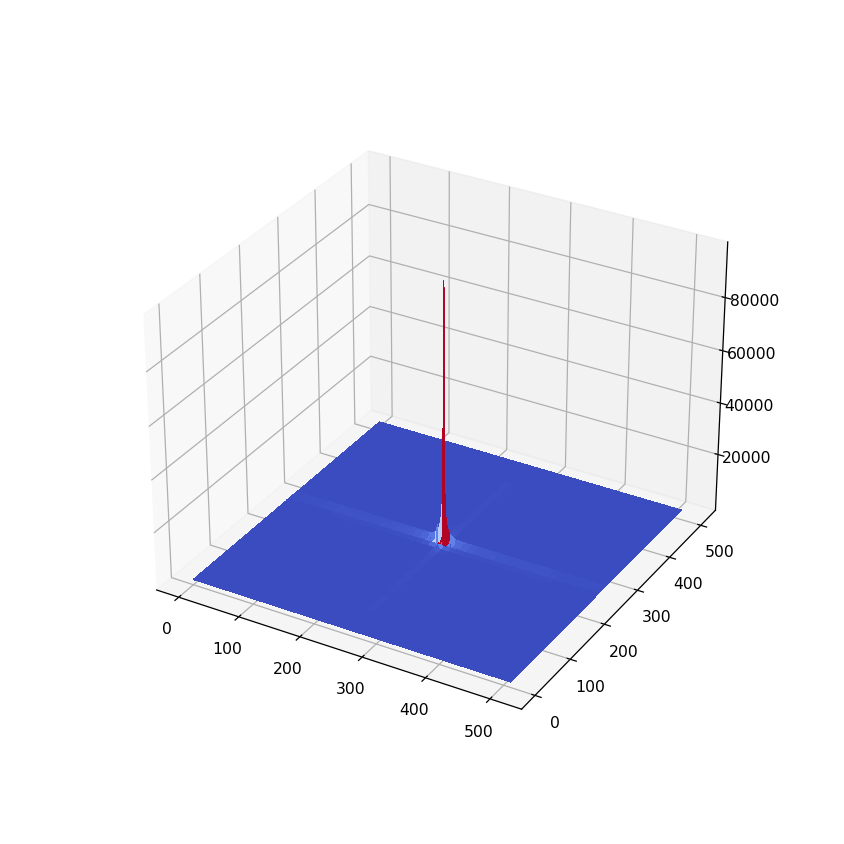

C:\Users\mojan\AppData\Local\Temp/ipykernel_19804/3906201160.py:40: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


0.17437556588706712


In [10]:
sig_orient10 = sinusoid2d(1,10,512,64,3/2)
rec = shannonInterpolation(sig_orient10, 3/2, 512)
ft = fftshift(np.absolute(fft2(rec)));

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(sig_orient10, cmap="gray")
f.add_subplot(1,2, 2)
plt.imshow(rec, cmap="gray")

surf(ft)
print(error(1,512,sig_orient10,rec))

#Maximal Frequency = 0.98.

#The additional drawback: Errors during reconstruction

6. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [ ]:
𝑥𝑟(𝑡,𝑢)=∑𝑘=−∞+∞∑𝑙=∞+∞𝑥𝑠(𝑘𝑇𝑠,𝑙𝑇𝑠)sinc(𝜋𝑓𝑠(𝑡−𝑘𝑇𝑠))sinc(𝜋𝑓𝑠(𝑢−𝑙𝑇𝑠))

In [14]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()


def shannonInterpolationLoop(img, period, dim):
    h, w = img.shape
    row, col = np.meshgrid(np.arange(dim), np.arange(h))
    arr = np.zeros((h,dim))
    he, we = arr.shape
    for i in range(he):
        for j in range(we):
            arr[i][j] = np.sinc(row[i][j]/period-col[i][j])
    
    row, col = np.meshgrid(np.arange(0,dim), np.arange(0,w))
    var = np.sinc(row/period-col)
    mult = np.matmul(img, arr)
    res = np.multiply(var.T, mult)
    return res
    
    
test = sinusoid2d(1,45,64,64,1)
tic()
print(shannonInterpolationLoop(test, 1, 64))
tac()


tic()
print(shannonInterpolation(test,1,64))
tac()


[[ 1.00000000e+00  3.88878268e-17 -3.86066045e-17 ... -9.39960708e-18
   2.99650374e-17  4.94354385e-18]
 [ 3.88878268e-17  1.00000000e+00  3.88878268e-17 ...  5.95065257e-17
  -9.39960708e-18  2.99650374e-17]
 [-3.86066045e-17  3.88878268e-17  1.00000000e+00 ... -3.36257508e-17
   5.95065257e-17 -9.39960708e-18]
 ...
 [-9.39960708e-18  5.95065257e-17 -3.36257508e-17 ...  1.00000000e+00
   3.88878268e-17 -3.86066045e-17]
 [ 2.99650374e-17 -9.39960708e-18  5.95065257e-17 ...  3.88878268e-17
   1.00000000e+00  3.88878268e-17]
 [ 4.94354385e-18  2.99650374e-17 -9.39960708e-18 ... -3.86066045e-17
   3.88878268e-17  1.00000000e+00]]
0.0625
[[ 1.          0.9975914   0.99037719 ... -0.45979664 -0.39709199
  -0.33247446]
 [ 0.9975914   1.          0.9975914  ... -0.52028635 -0.45979664
  -0.39709199]
 [ 0.99037719  0.9975914   1.         ... -0.57826974 -0.52028635
  -0.45979664]
 ...
 [-0.45979664 -0.52028635 -0.57826974 ...  1.          0.9975914
   0.99037719]
 [-0.39709199 -0.45979664 -0.


## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

<IPython.core.display.Javascript object>


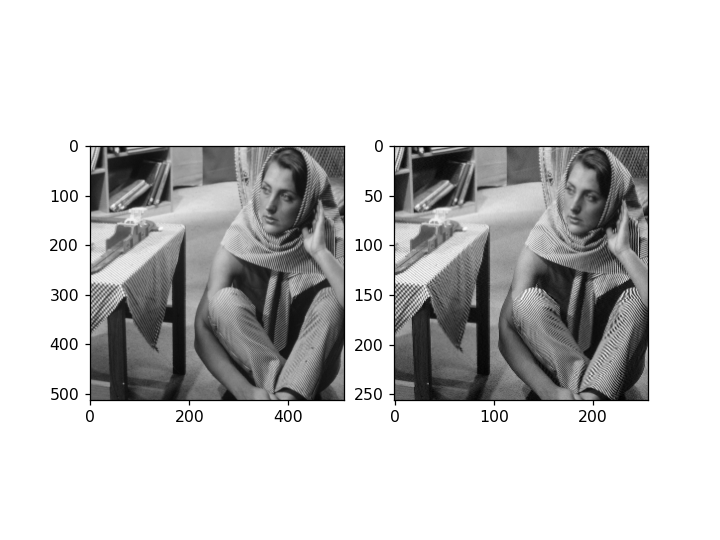

(256, 256)
(512, 512)


In [73]:
from PIL import Image

barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

sampled=subSample2(barbara)
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(barbara, cmap="gray")
f.add_subplot(1,2, 2)
plt.imshow(sampled, cmap="gray")

print(sampled.shape)
print(barbara.shape)

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

By subsampling by factor 2 we throw away every other row and column to create a half-size image.

Subsampling allows us to reduce the size of an image by a specified factor. We remove data(pixels) based on this specified interval and end up with an image with smaller dimensions and size.
The sampling rate should be lower than the Nyquist criterion would indicate.
When the sampling rate gets too low, we are not able to capture the details in the image anymore.

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

<IPython.core.display.Javascript object>


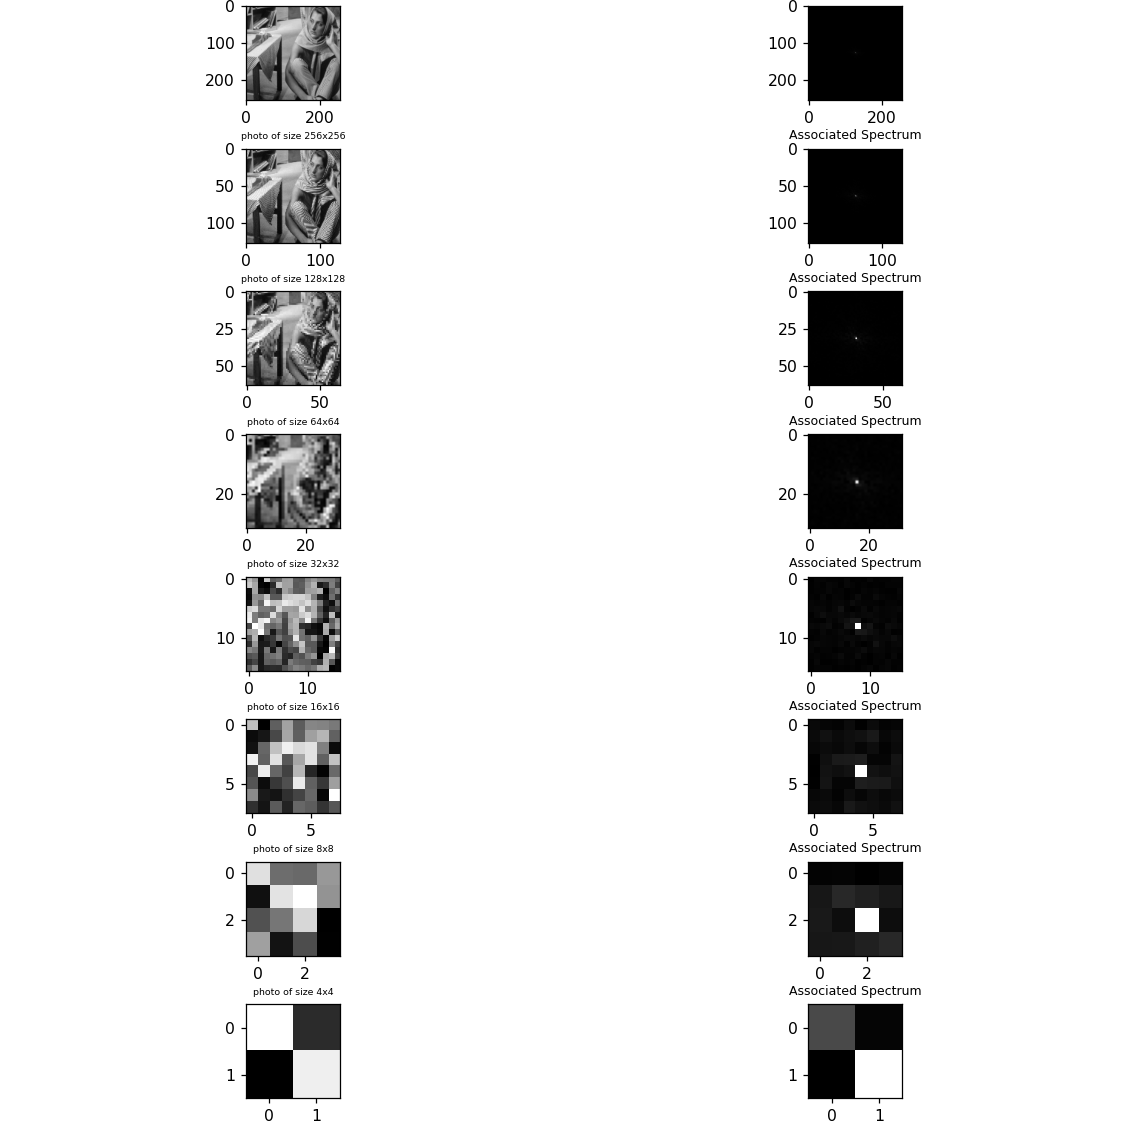

In [74]:
barb = np.copy(barbara)
dim = barb.shape[0]
i = 0

f, axarr = plt.subplots(8, 2, figsize=(10,10))
plt.tight_layout(pad=0, w_pad=0, h_pad=1.0)


while dim > 2:
    barb = subSample2(barb)
    fft_img = fftshift(np.abs(fft2(barb)))
    axarr[i, 0].imshow(barb)
    axarr[i, 0].set_title("photo of size " + str(dim) + "x" + str(dim), fontsize=6)
    axarr[i, 1].imshow(fft_img)
    axarr[i, 1].set_title("Associated Spectrum", fontsize=8)
    dim=dim//2
    i= i+1
    



<IPython.core.display.Javascript object>


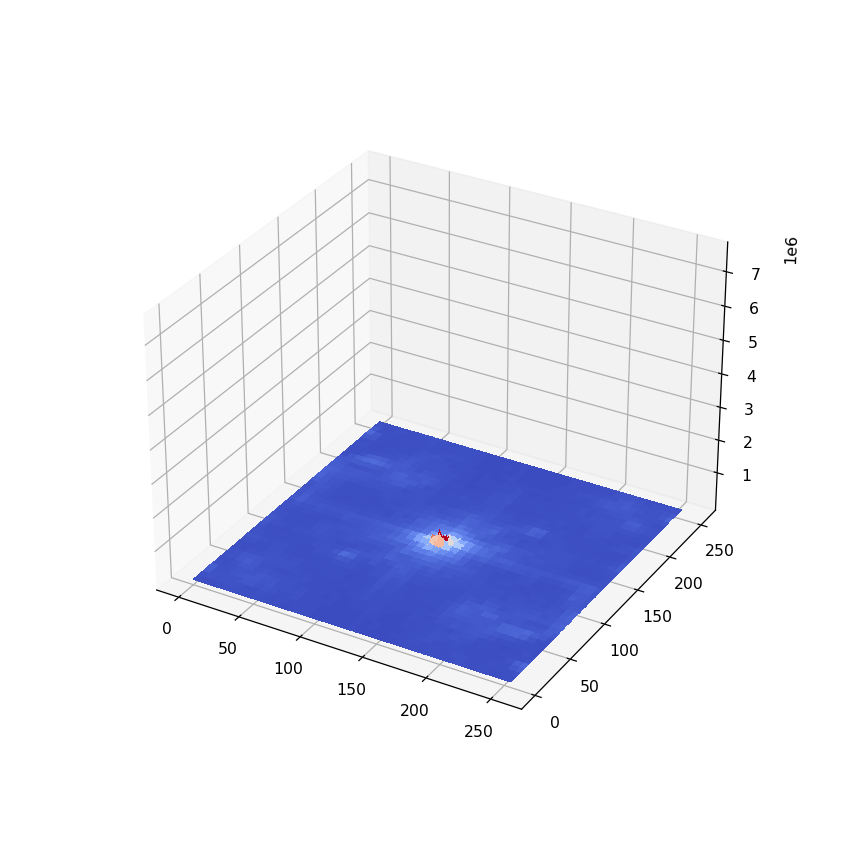

C:\Users\mojan\AppData\Local\Temp/ipykernel_28288/3906201160.py:40: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


<IPython.core.display.Javascript object>


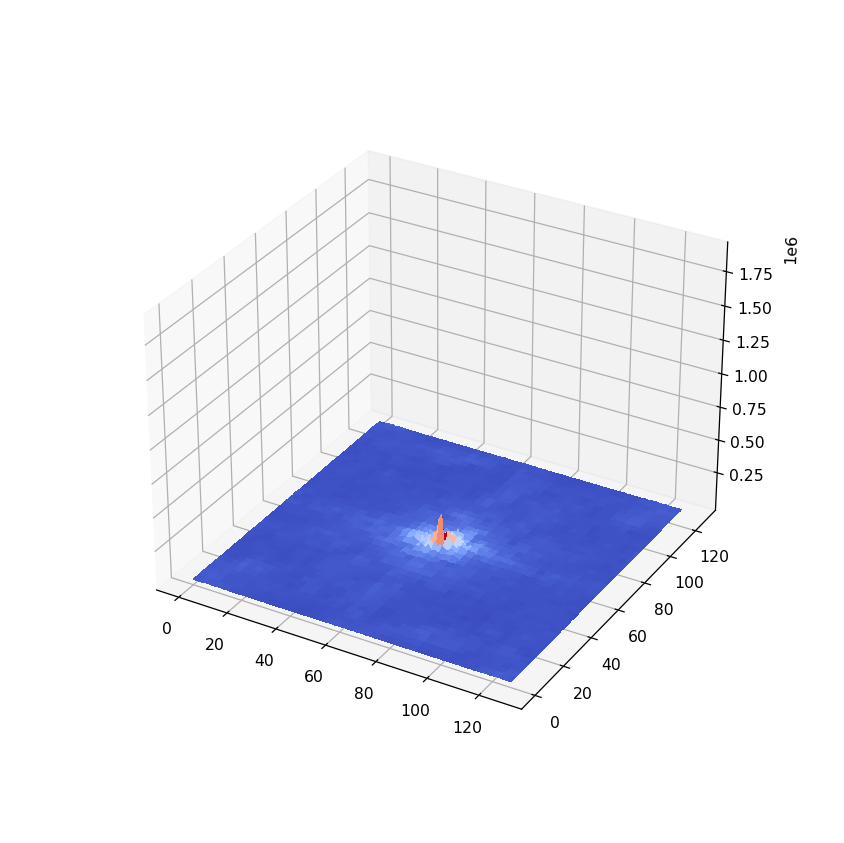

<IPython.core.display.Javascript object>


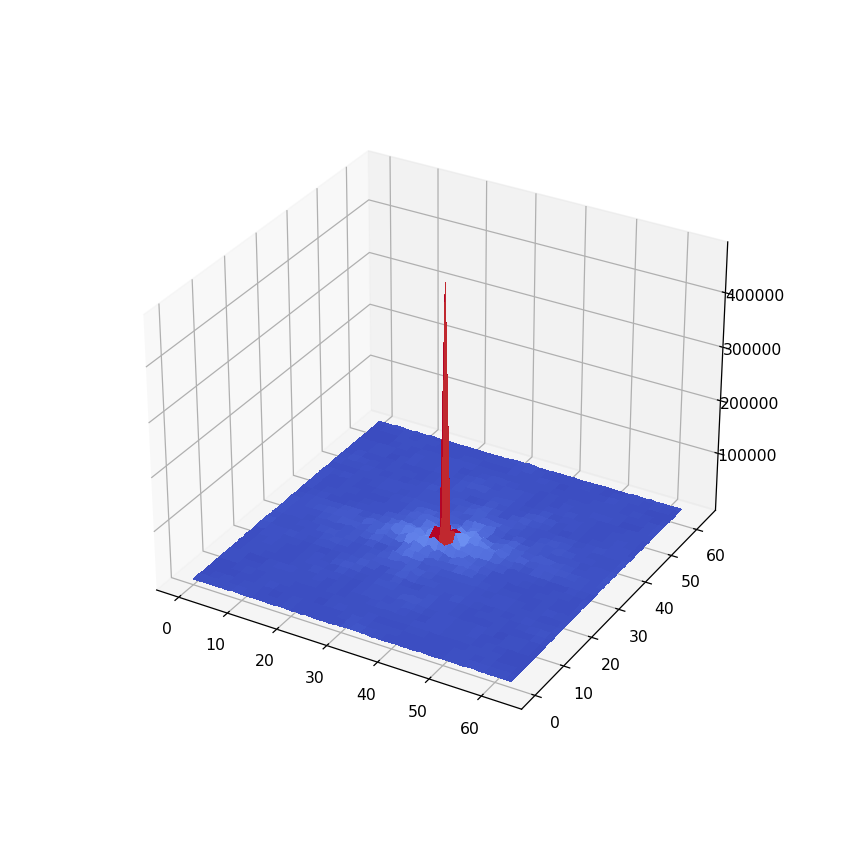

<IPython.core.display.Javascript object>


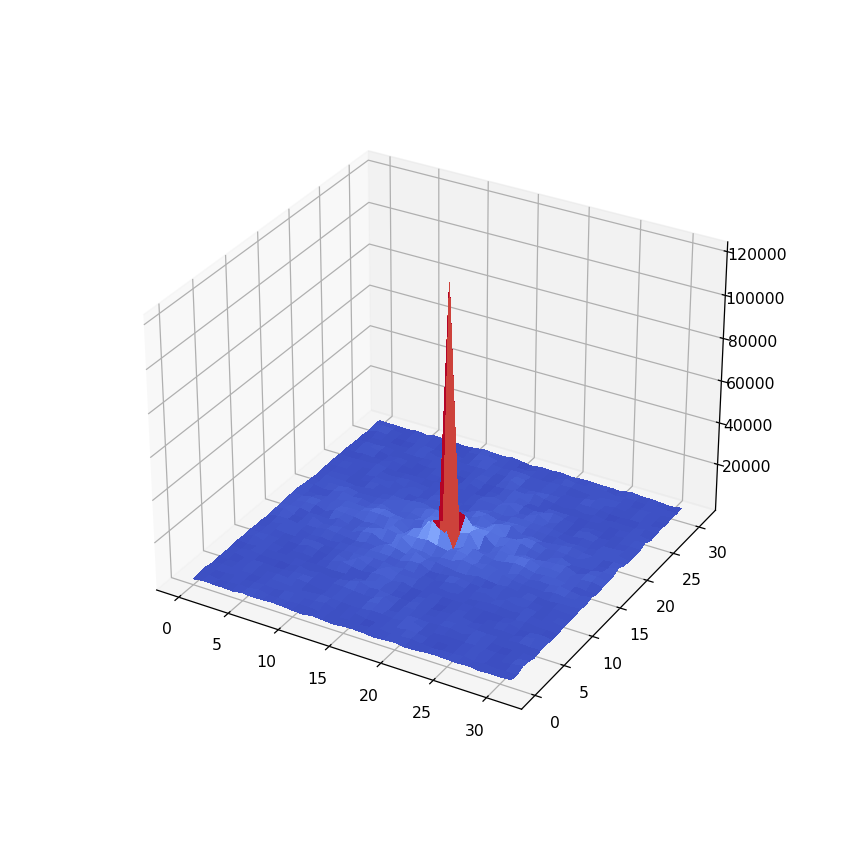

<IPython.core.display.Javascript object>


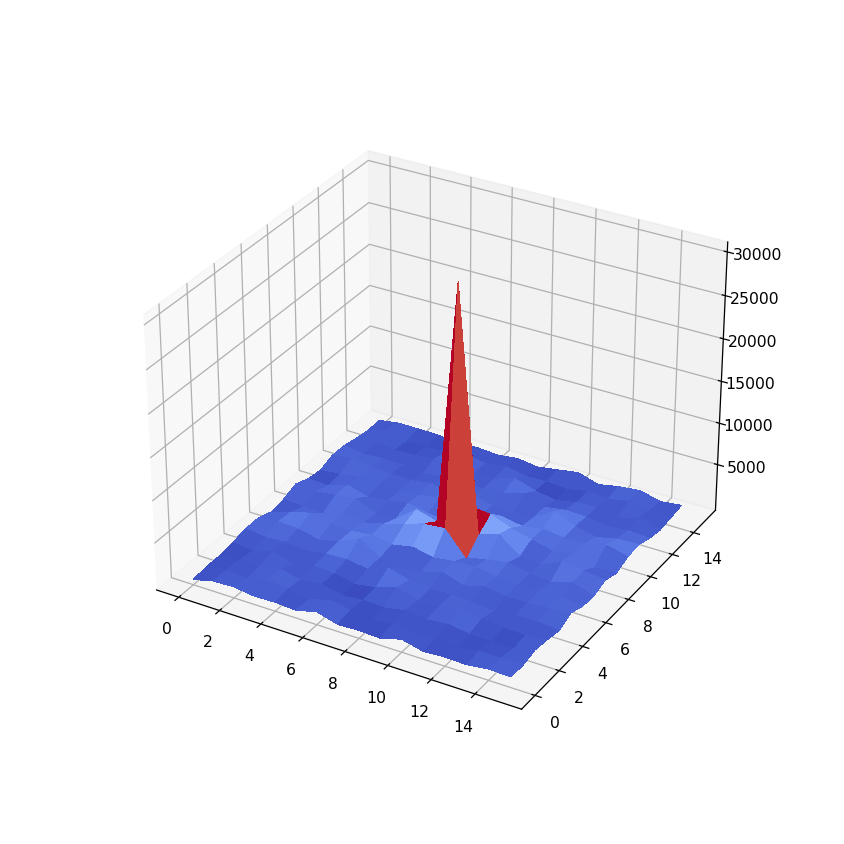

<IPython.core.display.Javascript object>


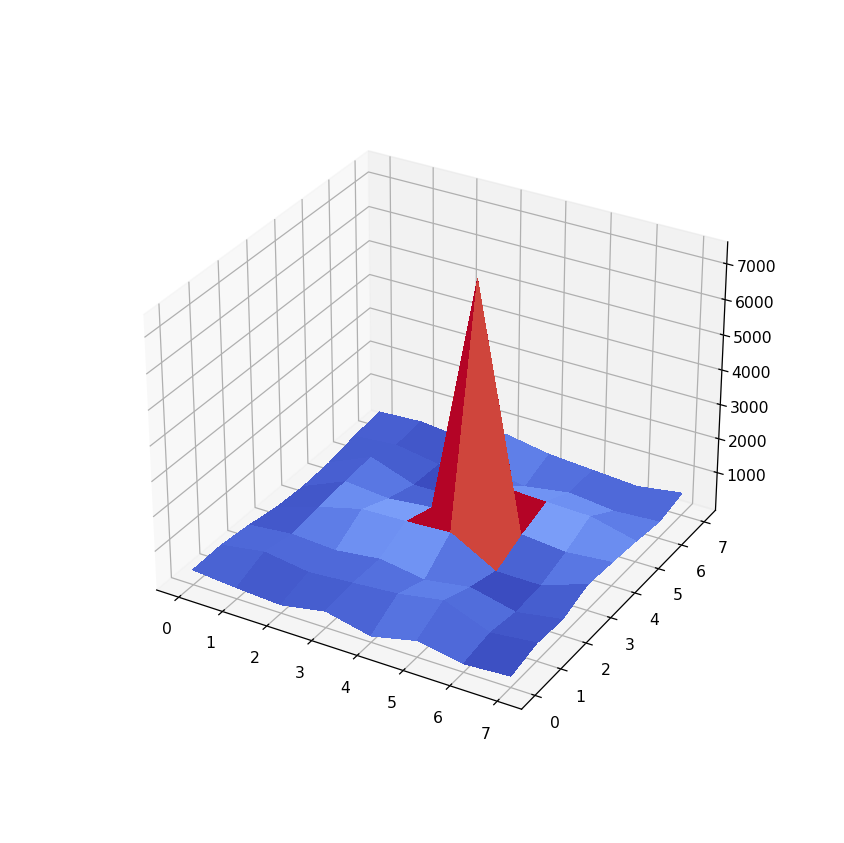

<IPython.core.display.Javascript object>


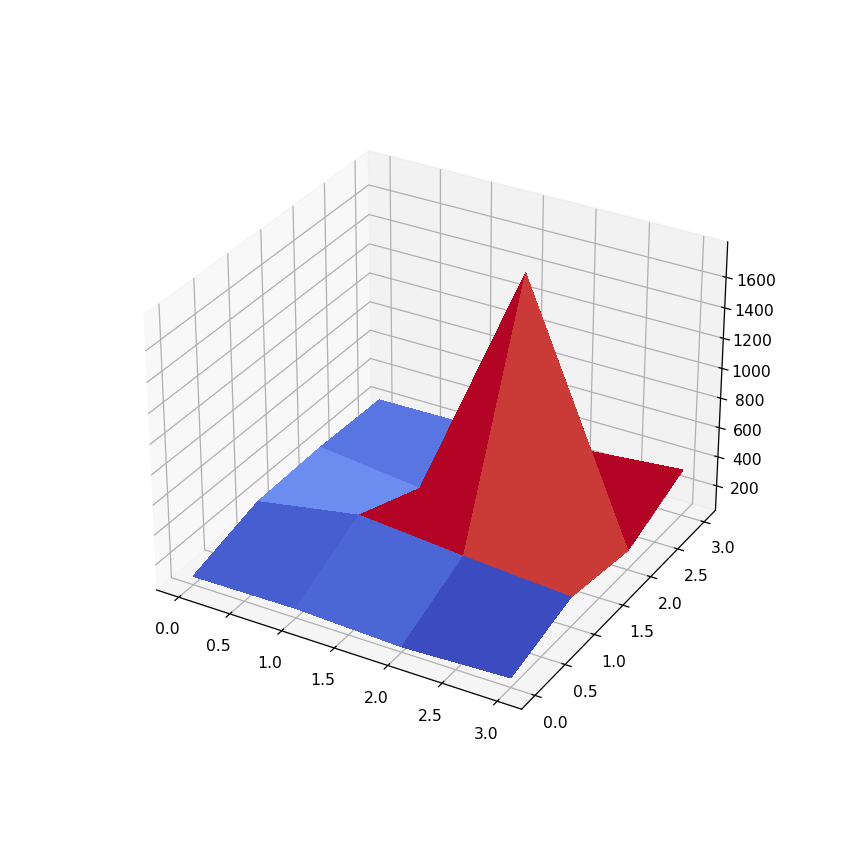

<IPython.core.display.Javascript object>


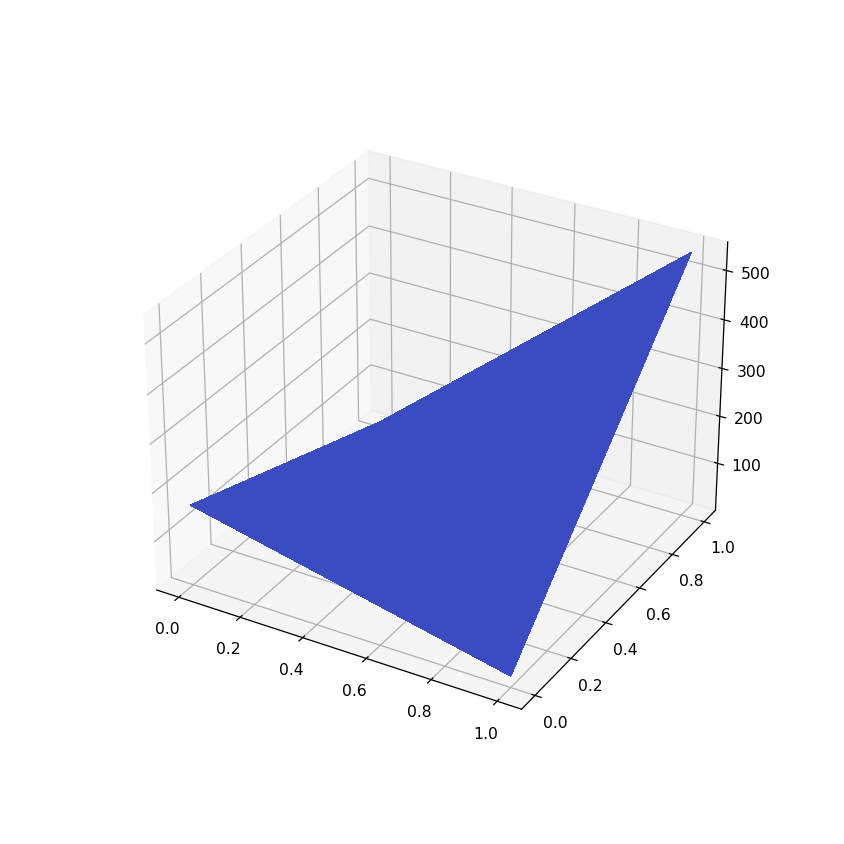

In [75]:
dim = 512
barb = np.copy(barbara)

while dim > 2:
    barb = subSample2(barb)
    fft_img = fftshift(np.abs(fft2(barb)))
    surf(fft_img)
    dim=dim//2


The spectrum becomes more concentrated. After the subsampling and due to loss of data, aliasing  can make an image look particularly digital in a disagreeable way.
It can also cause  tone jumping, or jagged edges or pixelation up to a point that image may not be recognizable anymore or so much fine details get lost.

3. Bonus question: same question with the image `img/mandrill.png`.

<IPython.core.display.Javascript object>


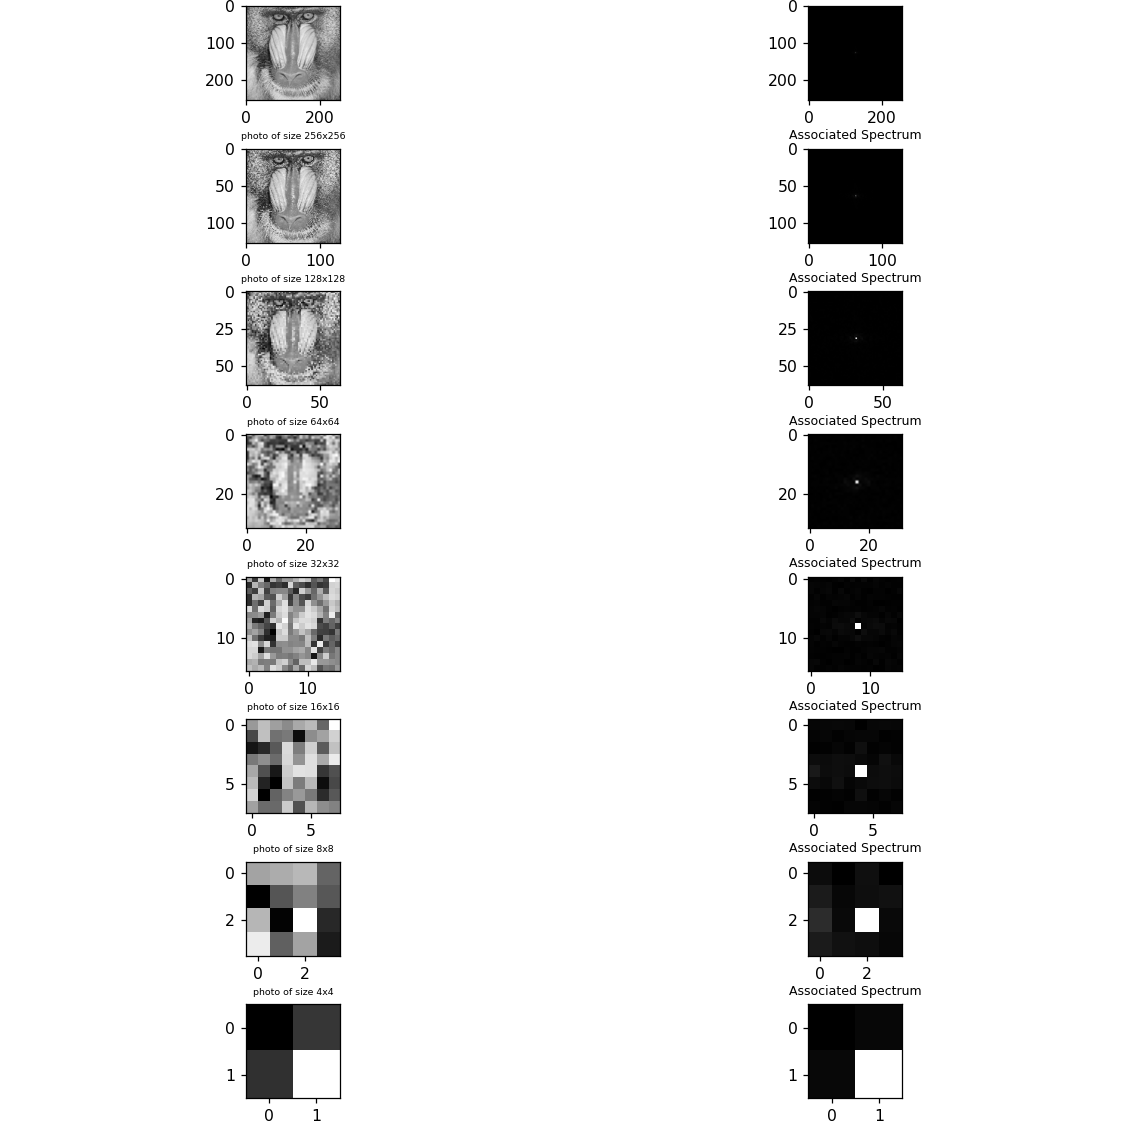

In [108]:
mandrill = np.array(Image.open('img/mandrill.png'))
f, axarr = plt.subplots(8, 2, figsize=(10,10))
plt.tight_layout(pad=0, w_pad=0, h_pad=1.0)

mand = np.copy(mandrill)
dim = mandrill.shape[0]
i=0

while dim > 2:
    mand = subSample2(mand)
    fft_img = fftshift(np.abs(fft2(mand)))
    axarr[i, 0].imshow(mand)
    axarr[i, 0].set_title("photo of size " + str(dim) + "x" + str(dim), fontsize=6)
    axarr[i, 1].imshow(fft_img)
    axarr[i, 1].set_title("Associated Spectrum", fontsize=8)
    dim=dim//2
    i+=1

